# Inspect All Data Post Processing

This notebook should be used after running the `process_all.py` program for all the raw data. Here's you can view all the returned variables relating to the statistics and center finding. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gued

%matplotlib widget

## Load Data

Read in the post processed data from a .h5 file. By specifying either run_numbers as a list of ints or run_numbers='all' you can choose how much of the data you wish to load

In [5]:
file_path =  "/sdf/scratch/users/l/lheald2/ued_postprocess/"
file_name = file_path + "test_data_2025-01-23.h5"
print(file_name)
gued.inspect_h5(file_name)

/sdf/scratch/users/l/lheald2/ued_postprocess/test_data_2025-01-23.h5
Group: test_set
Dataset: test_set/I_run_1
Dataset: test_set/I_run_10
Dataset: test_set/I_run_2
Dataset: test_set/I_run_3
Dataset: test_set/I_run_4
Dataset: test_set/I_run_5
Dataset: test_set/I_run_6
Dataset: test_set/I_run_7
Dataset: test_set/I_run_8
Dataset: test_set/I_run_9
Dataset: test_set/centers_run_1
Dataset: test_set/centers_run_10
Dataset: test_set/centers_run_2
Dataset: test_set/centers_run_3
Dataset: test_set/centers_run_4
Dataset: test_set/centers_run_5
Dataset: test_set/centers_run_6
Dataset: test_set/centers_run_7
Dataset: test_set/centers_run_8
Dataset: test_set/centers_run_9
Dataset: test_set/new_centers_run_1
Dataset: test_set/new_centers_run_10
Dataset: test_set/new_centers_run_2
Dataset: test_set/new_centers_run_3
Dataset: test_set/new_centers_run_4
Dataset: test_set/new_centers_run_5
Dataset: test_set/new_centers_run_6
Dataset: test_set/new_centers_run_7
Dataset: test_set/new_centers_run_8
Dataset:

In [8]:
group_name = "test_set"
#run_numbers = list(np.arange(0,9,1)) 
#print(run_numbers)
run_numbers = 'all'
# Don't read in the raw data (clean_images) unless you are not reading all images
variable_names = ["I", "centers", "new_centers", 
                  "percent_outliers", "percent_xrays", 
                  "stage_positions", "total_counts"]

In [9]:
# Read combined data
combined_data = gued.read_combined_data(file_name, group_name, variable_names, run_numbers=run_numbers)
print(combined_data.keys())

dict_keys(['I', 'centers', 'new_centers', 'percent_outliers', 'percent_xrays', 'stage_positions', 'total_counts'])


## View All Details

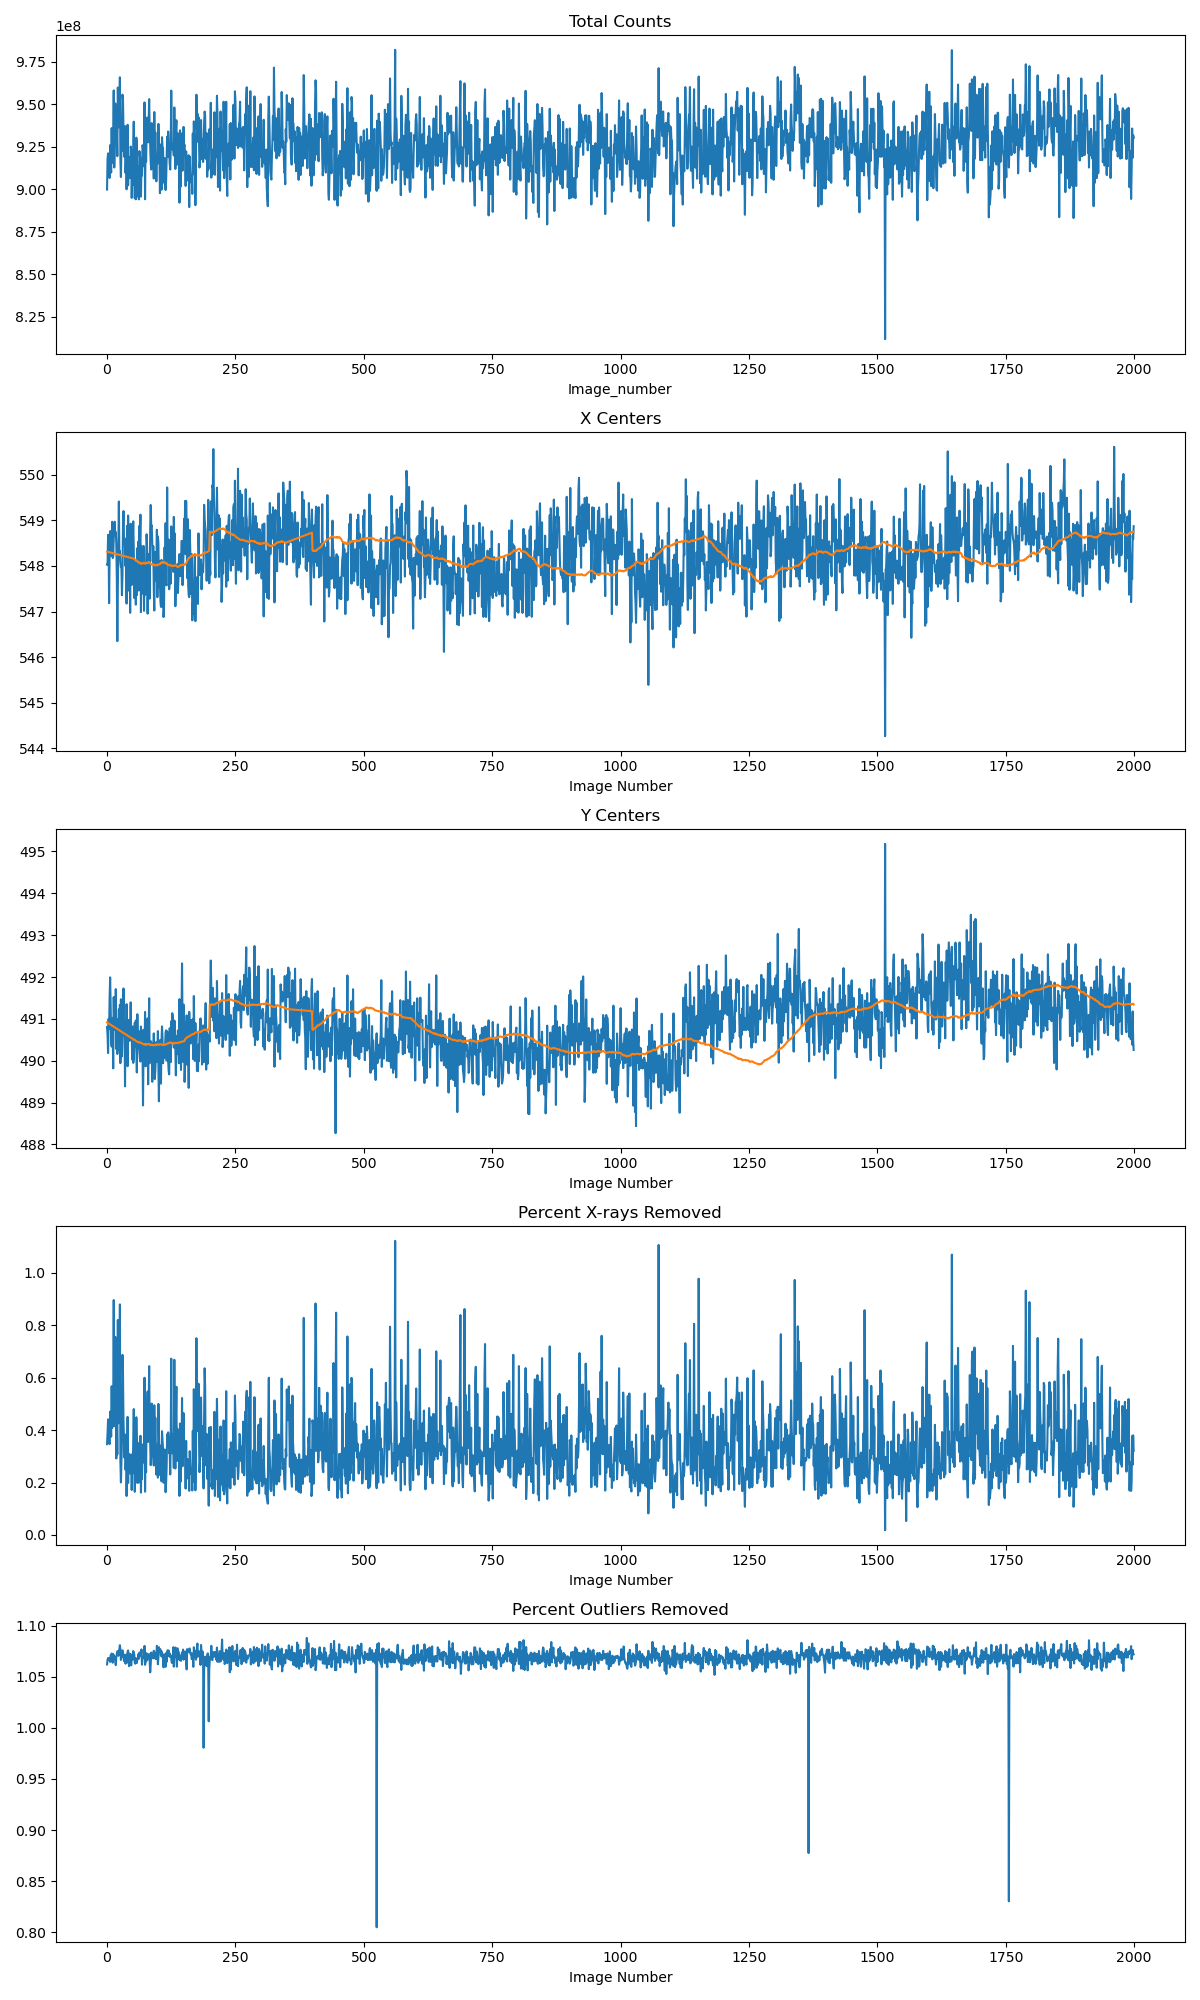

In [10]:
plt.figure(figsize=(12, 20))

plt.subplot(5, 1, 1)
plt.plot(combined_data['total_counts'])
plt.title("Total Counts")
plt.xlabel("Image_number")

plt.subplot(5, 1, 2)
plt.plot(combined_data['centers'][:,0])
plt.plot(combined_data["new_centers"][:,0])
plt.title("X Centers")
plt.xlabel("Image Number")

plt.subplot(5, 1, 3)
plt.plot(combined_data['centers'][:,1])
plt.plot(combined_data["new_centers"][:,1])
plt.title("Y Centers")
plt.xlabel("Image Number")

plt.subplot(5, 1, 4)
plt.plot(combined_data['percent_xrays'])
plt.title("Percent X-rays Removed")
plt.xlabel("Image Number")

plt.subplot(5, 1, 5)
plt.plot(combined_data['percent_outliers'])
plt.title("Percent Outliers Removed")
plt.xlabel("Image Number")

plt.tight_layout()
plt.show()


From here you can further filter the data based on the above information or you can move to generating the PDF and inspecting the dynamics of the data using other notebooks such as `PDF_Generation.ipynb` and `T0_Analysis.ipynb`

### Resmooth Center Testing

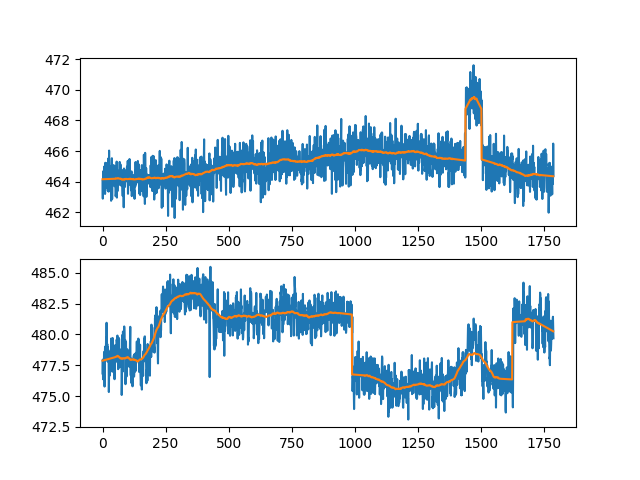

In [43]:
from scipy.signal import savgol_filter
centers_x = combined_data['centers'][:, 0]
centers_y = combined_data['centers'][:, 1]
# Apply Savitzky-Golay filter
window_size = 101  # Choose an odd number for the window size
poly_order = 1  # Choose the polynomial order
smoothed_x = np.concatenate((savgol_filter(centers_x[:1440], window_size, poly_order),
                            savgol_filter(centers_x[1441:1505], 35, poly_order), 
                            savgol_filter(centers_x[1505:], window_size, poly_order)))

smoothed_y = np.concatenate((savgol_filter(centers_y[:990], window_size, poly_order),
                            savgol_filter(centers_y[991:1627], window_size, poly_order), 
                            savgol_filter(centers_y[1627:], window_size, poly_order)))
smoothed_centers = list(zip(smoothed_x, smoothed_y))

plt.figure()
plt.subplot(2, 1, 1)
plt.plot(centers_x)
plt.plot(smoothed_x)

plt.subplot(2,1,2)
plt.plot(centers_y)
plt.plot(smoothed_y)
plt.show()